In [7]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import itertools
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch


In [8]:
train_dir = "E:\hand_gesture_E_chart\gestures"

In [9]:
image_x, image_y = 200, 200
batch_size = 64
num_of_classes = 4  # Number of output classes

In [10]:
def build_model(hp):
    num_of_classes = 4
    model = Sequential()
    model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (5, 5), input_shape=(image_x, image_y, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=512, max_value=2048, step=256), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.7, step=0.1)))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

Trial 3 Complete [00h 04m 34s]
val_accuracy: 0.953125

Best val_accuracy So Far: 0.9895833134651184
Total elapsed time: 1d 01h 48m 19s
Epoch 1/10
60/60 [==============================] - 144s 2s/step - loss: 0.8246 - accuracy: 0.6922 - val_loss: 0.2707 - val_accuracy: 0.9094
Epoch 2/10
60/60 [==============================] - 128s 2s/step - loss: 0.0835 - accuracy: 0.9721 - val_loss: 0.1918 - val_accuracy: 0.9312
Epoch 3/10
60/60 [==============================] - 124s 2s/step - loss: 0.0386 - accuracy: 0.9893 - val_loss: 0.1077 - val_accuracy: 0.9615
Epoch 4/10
60/60 [==============================] - 130s 2s/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.1194 - val_accuracy: 0.9667
Epoch 5/10
60/60 [==============================] - 127s 2s/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.1059 - val_accuracy: 0.9646
Epoch 6/10
60/60 [==============================] - 125s 2s/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.1241 - val_accuracy: 0.9708
Epoch 7/10
60/60 [=

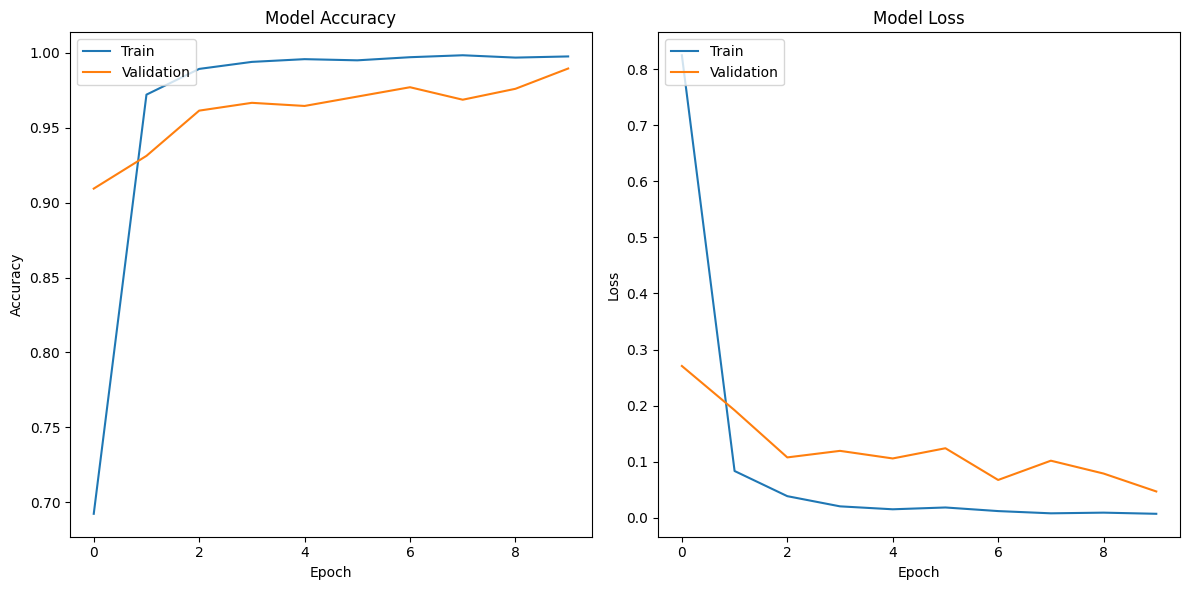

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
def main():
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        width_shift_range=0.2,
        
        height_shift_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_x, image_y),
        color_mode="grayscale",
        batch_size=batch_size,
        seed=42,
        class_mode='categorical',
        subset="training")

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_x, image_y),
        color_mode="grayscale",
        batch_size=batch_size,
        seed=42,
        class_mode='categorical',
        subset="validation")

    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=3,  # Number of hyperparameter combinations to try
        executions_per_trial=1,
        directory='my_dir',
        project_name='emojinator')

    tuner.search(train_generator, epochs=1, validation_data=validation_generator)

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    model = tuner.hypermodel.build(best_hps)

    history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


    # Plot accuracy and loss graphs
    plot_history(history)

    # Save the best model
    model.save('e_gesture_best.h5')

main()

In [14]:
tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=3,  # Number of hyperparameter combinations to try
        executions_per_trial=1,
        directory='my_dir',
        project_name='emojinator')

# Print details of all trials
print("Details of All Trials:")
for trial in tuner.oracle.get_best_trials(num_trials=3):
    print("Trial ID:", trial.trial_id)
    print("Hyperparameters:", trial.hyperparameters.values)
    print("Metrics:")
    print("  Validation Accuracy:", trial.metrics.get_last_value('val_accuracy'))
    print("  Validation Loss:", trial.metrics.get_last_value('val_loss'))
    print("  Training Accuracy:", trial.metrics.get_last_value('accuracy'))
    print("  Training Loss:", trial.metrics.get_last_value('loss'))


Reloading Tuner from my_dir\emojinator\tuner0.json
Details of All Trials:
Trial ID: 0
Hyperparameters: {'conv1_units': 32, 'conv2_units': 96, 'dense_units': 768, 'dropout': 0.30000000000000004}
Metrics:
  Validation Accuracy: 0.9895833134651184
  Validation Loss: 0.03731901943683624
  Training Accuracy: 0.999218761920929
  Training Loss: 0.0026858842466026545
Trial ID: 1
Hyperparameters: {'conv1_units': 128, 'conv2_units': 64, 'dense_units': 1536, 'dropout': 0.30000000000000004}
Metrics:
  Validation Accuracy: 0.9729166626930237
  Validation Loss: 0.07052000612020493
  Training Accuracy: 0.9924479126930237
  Training Loss: 0.020398078486323357
Trial ID: 2
Hyperparameters: {'conv1_units': 96, 'conv2_units': 64, 'dense_units': 1024, 'dropout': 0.4}
Metrics:
  Validation Accuracy: 0.953125
  Validation Loss: 0.15072037279605865
  Training Accuracy: 0.8526041507720947
  Training Loss: 0.42129552364349365


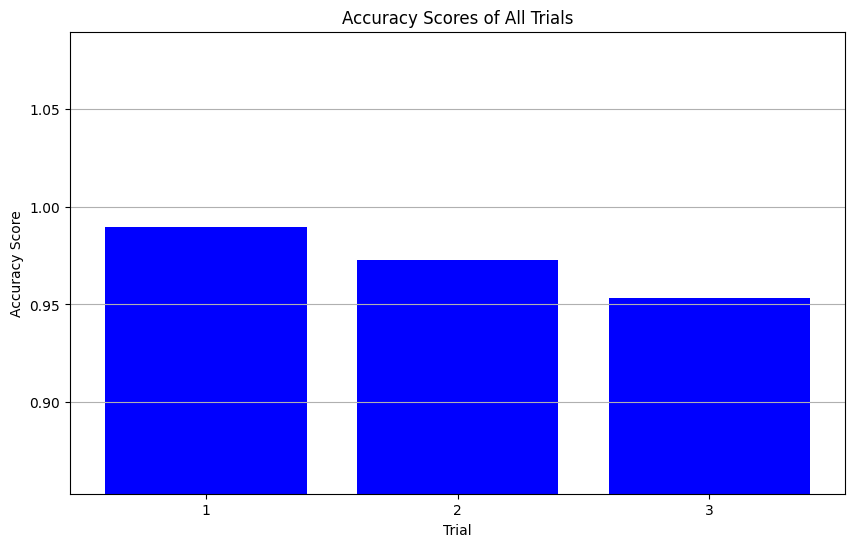

In [16]:
import matplotlib.pyplot as plt

accuracy_scores = []
for trial in tuner.oracle.get_best_trials(num_trials=3):
    accuracy_scores.append(trial.score)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(accuracy_scores) + 1), accuracy_scores, color='blue')
plt.xlabel('Trial')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of All Trials')
plt.xticks(range(1, len(accuracy_scores) + 1))
plt.ylim(min(accuracy_scores) - 0.1, max(accuracy_scores) + 0.1)
plt.grid(axis='y')
plt.show()
